In [1]:
import psycopg2
import pandas as pd
import config
from matplotlib import pylab as plt
import seaborn as sns
import numpy as np
from IPython.display import display, HTML
import re


color_palette = sns.color_palette(palette='muted', n_colors=None, desat=.75)
sns.set(context='notebook', palette=color_palette, style='whitegrid', font='sans-serif', font_scale=1.5, color_codes=False, rc=None)
pd.set_option('display.max_colwidth', -1)
table_styles = [{'selector': 'td',
                 'props': [('min-width', '100px'), ('text-align', 'center')]},
                {'selector': 'tr',
                 'props': [('border-bottom', '1px dotted black')]},
                {'selector': 'th',
                 'props': [('text-align', 'center')]}
               ]

%matplotlib inline

directory = "url_top_lists/"
stream = "comparison"

In [2]:
conn = None
try:
    # read connection parameters
    paramsS17 = config.cfgAzureS17()
    paramsS03 = config.cfgAzureS03()

    paramsF17 = config.cfgAzureF17()
    paramsF03 = config.cfgAzureF03()
    
    # connect to the PostgreSQL server
    print('Connecting to the PostgreSQL database...')
    connS17 = psycopg2.connect(**paramsS17)
    connS03 = psycopg2.connect(**paramsS03)
    
    connF17 = psycopg2.connect(**paramsF17)
    connF03 = psycopg2.connect(**paramsF03)

    # create a cursor
    curS17 = connS17.cursor()
    curS03 = connS03.cursor()
    
    curF17 = connF17.cursor()
    curF03 = connF03.cursor()

    # execute a statement
    print('PostgreSQL database version:')
    
    curS17.execute('SELECT version()')
    curS03.execute('SELECT version()')
    curF17.execute('SELECT version()')
    curF03.execute('SELECT version()')
    
    # display the PostgreSQL database server version
    db_version_curS17 = curS17.fetchone()
    db_version_curS03 = curS03.fetchone()
    db_version_curF17 = curF17.fetchone()
    db_version_curF03 = curF03.fetchone()
    
    print(db_version_curS17)
    print(db_version_curS03)
    print(db_version_curF17)
    print(db_version_curF03)

    # close the communication with the PostgreSQL
    curS17.close()
    curS03.close()
    curF17.close()
    curF03.close()

except (Exception, psycopg2.DatabaseError) as error:
    print(error)

Connecting to the PostgreSQL database...
PostgreSQL database version:
('PostgreSQL 9.6.7, compiled by Visual C++ build 1800, 64-bit',)
('PostgreSQL 9.6.7, compiled by Visual C++ build 1800, 64-bit',)
('PostgreSQL 9.6.7, compiled by Visual C++ build 1800, 64-bit',)
('PostgreSQL 9.6.7, compiled by Visual C++ build 1800, 64-bit',)


## Query User URLs

### Sampled Data - Week 03

In [32]:
usersS03 = pd.read_sql_query('''SELECT * FROM tweets_users
                                ''', connS03 )
print("Number of Users: %s" %len(usersS03))


hashtagsS03 = pd.read_sql_query('''SELECT * FROM tweets_hashtags
                                ''', connS03 )
print("Number of Hashtags: %s" %len(hashtagsS03))


urlsS03 = pd.read_sql_query('''SELECT * FROM tweets_urls
                                ''', connS03 )

print("Number of URLs: %s" %len(urlsS03))


tweetsS03 = pd.read_sql_query('''SELECT *
                                 FROM tweets_info;''', connS03 )

print("Number of Tweets: %s" %len(tweetsS03))
tweetsS03.head()

Number of Users: 73706
Number of Hashtags: 84203
Number of URLs: 40339
Number of Tweets: 123680


,id,user_id,text,created_at,source,lang,truncated,is_retweet,retweet_id,is_quote,...,favorite_count,favorited,retweeted,hashtags,user_mentions,number_of_urls,extracted,coordinates_type,coordinates_long,coordinates_lat
0,952676732913401856,1121790578,"Gute Nacht von allen von Ihnen, Japan des Anhängers.\nMorgen Vielen Dank im Voraus.",Sun Jan 14 23:00:07 +0000 2018,"<a href=""http://autotweety.net"" rel=""nofollow"">autotweety.net</a>",de,False,False,NaN,False,...,0,False,False,None,None,0,False,None,NaN,NaN
1,952676745496354816,824737881763745792,"William Haubrich - Legend - Photograph Gregory Franz! @ Cape Town, Western Cape https://t.co/GlnUAK11Z4",Sun Jan 14 23:00:10 +0000 2018,"<a href=""http://instagram.com"" rel=""nofollow"">Instagram</a>",de,False,False,NaN,False,...,0,False,False,None,None,1,False,None,NaN,NaN
2,952676758066737158,16947788,U13-Cup in Wermelskirchen: Einmal kicken gegen künftige Weltstars https://t.co/D9crQROdfJ,Sun Jan 14 23:00:13 +0000 2018,"<a href=""http://www.rp-online.de"" rel=""nofollow"">RP ONLINE - Wermelskirchen</a>",de,False,False,NaN,False,...,0,False,False,None,None,1,False,None,NaN,NaN
3,952676758066728960,950898579735851008,Tochter meiner Freundin vernascht https://t.co/Kk0vvZnniM,Sun Jan 14 23:00:13 +0000 2018,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",de,False,False,NaN,False,...,0,False,False,None,None,1,False,None,NaN,NaN
4,952676770679058432,900374406190518272,Meine frau wird fremdgefickt iv clip1\n#milf #porno #ass #HDvideos #SoloMale #HDвидео\nhttps://t.co/jy2HsDumtV,Sun Jan 14 23:00:16 +0000 2018,"<a href=""http://luxviral.com"" rel=""nofollow"">twitterappmila</a>",de,False,False,NaN,False,...,0,False,False,milf porno ass HDvideos SoloMale HDвидео,None,1,False,None,NaN,NaN


In [23]:
top50url = usersS03['resolved_url'].value_counts()[:50]

In [24]:
top50url

Series([], Name: resolved_url, dtype: int64)

In [15]:
userURLsS03[userURLsS03['resolved_url'] == top50url.index[0]]

,tweet_id,short_url,resolved_url,response_code,domain,top_level_domain,is_twitter_url,is_media,is_processed,failed
96,952688003029270530,http://bit.ly/2pPV2ar,http://dienstleistungstausch.org/,403.0,http://dienstleistungstausch.org/,dienstleistungstausch.org,False,False,True,False
148,952695703742140417,http://bit.ly/2pPV2ar,http://dienstleistungstausch.org/,403.0,http://dienstleistungstausch.org/,dienstleistungstausch.org,False,False,True,False
165,952699403118276609,http://bit.ly/2pPV2ar,http://dienstleistungstausch.org/,403.0,http://dienstleistungstausch.org/,dienstleistungstausch.org,False,False,True,False
233,952711897966620672,http://bit.ly/2pPV2ar,http://dienstleistungstausch.org/,403.0,http://dienstleistungstausch.org/,dienstleistungstausch.org,False,False,True,False
318,952737244154036224,http://bit.ly/2pPV2ar,http://dienstleistungstausch.org/,403.0,http://dienstleistungstausch.org/,dienstleistungstausch.org,False,False,True,False
330,952740960307417089,http://bit.ly/2pPV2ar,http://dienstleistungstausch.org/,403.0,http://dienstleistungstausch.org/,dienstleistungstausch.org,False,False,True,False
366,952752171677896704,https://goo.gl/wS2nvK,http://dienstleistungstausch.org/,403.0,http://dienstleistungstausch.org/,dienstleistungstausch.org,False,False,True,False
467,952774825105338368,https://goo.gl/gc6CgN,http://dienstleistungstausch.org/,403.0,http://dienstleistungstausch.org/,dienstleistungstausch.org,False,False,True,False
614,952793716233854976,https://goo.gl/Y7DK8M,http://dienstleistungstausch.org/,403.0,http://dienstleistungstausch.org/,dienstleistungstausch.org,False,False,True,False
743,952805040871309312,http://bit.ly/2pPV2ar,http://dienstleistungstausch.org/,403.0,http://dienstleistungstausch.org/,dienstleistungstausch.org,False,False,True,False


In [16]:
userURLsS03[userURLsS03['resolved_url'] == top50url.index[0]]['tweet_id'].values

array([952688003029270530, 952695703742140417, 952699403118276609,
       952711897966620672, 952737244154036224, 952740960307417089,
       952752171677896704, 952774825105338368, 952793716233854976,
       952805040871309312, 952827669133119488, 952831439837519873,
       953824277698146305, 952880542541893632, 952891854558777344,
       952903376311762945, 952906933090086912, 952937127872028672,
       953008850474553345, 953020204463902720, 953023757043384320,
       953023975143231488, 953061761627967489, 953069068113756160,
       953069248481517569, 953073031726977024, 953076794038673410,
       953084364736421888, 953152287307943936, 953208914606206976,
       953299519965401088, 953348589127954432, 953427861456805888,
       953420450129948672, 953431770569039872, 953435415410769920,
       953461885642428416, 953465593398689793, 953465677309935616,
       953499600853307392, 953507133793931265, 953708443617067009,
       953537357948518400, 953548678366662656, 953559977825890

In [17]:
usersS03

,id,name,location,url,description,protected,verified,followers_count,friends_count,listed_count,...,created_at,geo_enabled,lang,contributors_enabled,profile_background_image_url,profile_use_background_image,profile_image_url,profile_banner_url,default_profile,default_profile_image
0,1121790578,gontavichi_duck,Saitama.Pref Japan,None,A duck automatically murmurs greetings in Greenwich Mean Time.,False,False,108,1033,0,...,Sat Jan 26 12:04:35 +0000 2013,False,ja,False,http://abs.twimg.com/images/themes/theme1/bg.png,true,http://pbs.twimg.com/profile_images/695947193098743808/siwK7hVv_normal.jpg,https://pbs.twimg.com/profile_banners/1121790578/1486812195,True,False
1,824737881763745792,Glenn Robertson,None,None,None,False,False,14,0,0,...,Thu Jan 26 21:56:48 +0000 2017,False,en-gb,False,,true,http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png,None,True,False
2,16947788,Wermelskirchen,RP Online Wermelskirchen,http://www.rp-online.de/wermelskirchen,Nachrichten und Fotos aus der Stadt Wermelskirchen - direkt von RP ONLINE. Fragen bitte an @rponline. Alle Accounts: http://www.rp-online.de/twitter,False,False,244,3,8,...,Fri Oct 24 11:37:24 +0000 2008,False,de,False,http://abs.twimg.com/images/themes/theme1/bg.png,true,http://pbs.twimg.com/profile_images/755797967563550720/M8ikWSDS_normal.jpg,https://pbs.twimg.com/profile_banners/16947788/1470145602,True,False
3,950898579735851008,Iris Mcdougal,None,None,None,False,False,1,0,0,...,Wed Jan 10 01:14:23 +0000 2018,False,ru,False,,true,http://pbs.twimg.com/profile_images/951358769866342400/IeSlkZcJ_normal.jpg,None,True,False
4,900374406190518272,Mila porn video,"New York, USA",None,"I love sex))) Erotic movies, beautiful pornography",False,False,4772,22,5,...,Wed Aug 23 15:09:21 +0000 2017,False,ru,False,http://abs.twimg.com/images/themes/theme1/bg.png,false,http://pbs.twimg.com/profile_images/900375617979506690/DxfKxdS0_normal.jpg,https://pbs.twimg.com/profile_banners/900374406190518272/1503501810,False,False
5,499069779,For You; Belle,Ecuador.,None,Buy and stream For You by Liam Payne and Rita Ora🔥.,False,False,25933,4142,30,...,Tue Feb 21 18:55:28 +0000 2012,False,es,False,http://pbs.twimg.com/profile_background_images/534079690764349440/2yx6xBYI.png,true,http://pbs.twimg.com/profile_images/951203172068012034/TJJZmFI1_normal.jpg,https://pbs.twimg.com/profile_banners/499069779/1515170589,False,False
6,2946761284,#fσяуσυ,None,None,"@lelepons & @justinbieber follow26 /11/2017 ♡-stan Hilary,lea,MAGCON, GLEE,liam,1D,dua,loren,5h,Camila,HRVY,W1,MXM,lele,jonas,Rowland's,Jelena,B&M, The Vamps-♡",False,False,870,3499,0,...,Sun Dec 28 23:53:28 +0000 2014,True,es,False,http://abs.twimg.com/images/themes/theme1/bg.png,true,http://pbs.twimg.com/profile_images/947426877261561856/D36sDr7X_normal.jpg,https://pbs.twimg.com/profile_banners/2946761284/1511197099,True,False
7,16946111,RP Online Düsseldorf,Düsseldorf,http://www.rp-online.de/duesseldorf,Erhalten Sie Nachrichten und Fotos aus der Stadt Düsseldorf direkt von RP ONLINE. Fragen bitte an @rponline. Alle Accounts: http://www.rp-online.de/twitter,False,False,21347,24,240,...,Fri Oct 24 08:56:18 +0000 2008,True,de,False,http://abs.twimg.com/images/themes/theme1/bg.png,true,http://pbs.twimg.com/profile_images/755787144057262081/J1zNBqD-_normal.jpg,https://pbs.twimg.com/profile_banners/16946111/1469709092,True,False
8,85791361,Gregor Schütze,Wien,None,"Privater Account I Unternehmer, Abenteurer, Familienmensch",False,False,709,382,26,...,Wed Oct 28 10:56:31 +0000 2009,False,de,False,http://abs.twimg.com/images/themes/theme1/bg.png,false,http://pbs.twimg.com/profile_images/868058788884094976/Zt2Pg7bq_normal.jpg,https://pbs.twimg.com/profile_banners/85791361/1495796289,False,False
9,2877716111,Krades,Gehört zur fancy TryhardGang,None,#DieAusländer | Hail Nobuo Uematsu! | Pokemon- und Animefan | Profilbild von @Byakkosenpai :3 | Wird mit @Chipsterlars geshippt ( ͡° ͜ʖ ͡°) #Kiliars 3,False,False,110,202,1,...,Sat Nov 15 08:15:4

In [65]:
bot_net = pd.read_sql_query('''
       Select ti.id, ti.text, ti.created_at as tweet_date, ti.hashtags, 
              uu.short_url,
              uu.resolved_url as resolved_user_url, uu.top_level_domain, 
              tu.name, tu.id as user_id, tu.description, tu.created_at as user_date, tu.lang as user_lang from tweets_info as ti
       INNER JOIN user_urls as uu ON ti.id = uu.tweet_id
       INNER JOIN tweets_users as tu ON ti.user_id = tu.id''', connS03 )

In [80]:
bot_net['resolved_user_url'].value_counts()

http://dienstleistungstausch.org/                                        218
https://www.miet-check.de/                                               189
https://www.benzinpreis-aktuell.de/                                      187
https://www.welt.de/                                                     157
https://gab.ai/Einzelfallinfos                                           144
http://topnews.koeln/                                                    133
http://www.bbc.koeln/                                                    127
http://www.tagesschau.de/                                                102
http://mcaf.ee/o8ulm0?SparVolltreffer                                    102
http://dienstleistungstausch.org                                         96 
http://www.deutscher-warndienst.de/                                      77 
https://www.wunschimmo.de/                                               75 
http://www.spiegel.de/                                                   75 

Text(0.5,1,'Top 10 Profile URLs - Sampled Stream (Calendar Week 03)')

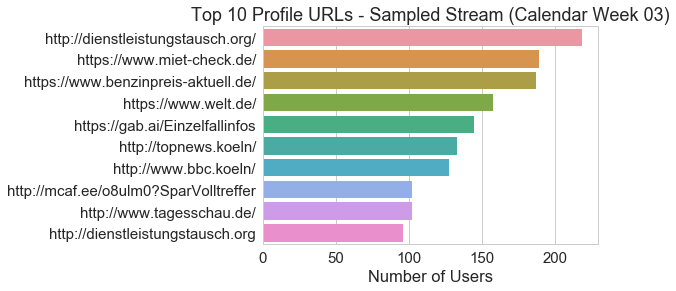

In [64]:
#plt.figure(figsize=(16,12))

ax = sns.barplot(y=bot_net['resolved_user_url'].value_counts()[:10].index, x=bot_net['resolved_user_url'].value_counts()[:10])
ax.set_xlabel("Number of Users")
ax.set_title("Top 10 Profile URLs - Sampled Stream (Calendar Week 03)")

In [66]:
bot_net['short_url'].value_counts()[:10]

http://www.miet-check.de                 190
https://www.benzinpreis-aktuell.de       187
http://www.welt.de                       154
http://bit.ly/2pPV2ar                    146
https://gab.ai/Einzelfallinfos           145
http://TopNews.koeln                     133
http://www.bbc.koeln/                    127
http://www.GermanPersonnel.de            113
http://mcaf.ee/o8ulm0?SparVolltreffer    102
http://www.tagesschau.de                 99 
Name: short_url, dtype: int64

In [81]:
bot_net_dienst = bot_net.loc[bot_net['top_level_domain'] == 'dienstleistungstausch.org']
bot_net_dienst

,id,text,tweet_date,hashtags,short_url,resolved_user_url,top_level_domain,name,user_id,description,user_date,user_lang
12,952680235165626368,1x oder 2x 40 Min. #Massage mit Öl inkl. Schröpfen bei By Souha Beauty (bis zu 50% #sparen*) https://t.co/dTqZi40Bbc,Sun Jan 14 23:14:02 +0000 2018,Massage sparen,http://www.dienstleistungstausch.org,http://www.dienstleistungstausch.org/,dienstleistungstausch.org,Arlie Hitchens,248367761,None,Sun Feb 06 21:14:43 +0000 2011,de
22,952684219758718977,Hartman #Verde #Klappsesselauflage #123x50x5cm Grün https://t.co/ZTskkz4JC7,Sun Jan 14 23:29:52 +0000 2018,Verde Klappsesselauflage 123x50x5cm,http://bit.ly/2pPV2ar,http://dienstleistungstausch.org/,dienstleistungstausch.org,David Garay,209502774,😳😳😳,Fri Oct 29 09:36:49 +0000 2010,en
45,952699403118276609,#Corvette C6 - selber #fahren in #Wunstorf-Mesmerode: Ein #Wochenende lang die Corvette C6 #erleben https://t.co/FQRaGyCukm,Mon Jan 15 00:30:12 +0000 2018,Corvette fahren Wunstorf Wochenende erleben,http://bit.ly/2pPV2ar,http://dienstleistungstausch.org/,dienstleistungstausch.org,Wanda Diaz,209191582,None,Thu Oct 28 17:58:54 +0000 2010,en
101,952752171677896704,Pantoffel #Tieroptik #Pantherfell 42/43 https://t.co/OdLF2PUU5w,Mon Jan 15 03:59:53 +0000 2018,Tieroptik Pantherfell,https://goo.gl/wS2nvK,http://dienstleistungstausch.org/,dienstleistungstausch.org,FranziMueller,371769047,None,Sun Sep 11 13:45:36 +0000 2011,de
131,952774825105338368,#wash+dry Fußmatte Cyclone taupe #waschbare #Fußmatte https://t.co/QfOJkALn1x,Mon Jan 15 05:29:54 +0000 2018,wash waschbare Fußmatte,https://goo.gl/gc6CgN,http://dienstleistungstausch.org/,dienstleistungstausch.org,Julia Yates,216080876,🤭🤭🤭🤭🤭,Mon Nov 15 19:03:41 +0000 2010,en
171,952793716233854976,#Glas-Schiebetür mit Motiv #Schönebeck https://t.co/xjhHE6Doha,Mon Jan 15 06:44:58 +0000 2018,Glas Schönebeck,https://goo.gl/Y7DK8M,http://dienstleistungstausch.org/,dienstleistungstausch.org,Sophie Wolter,209747356,🤭🤭🤭🤭,Fri Oct 29 21:00:04 +0000 2010,en
284,952827669133119488,Wie kann ich die #Luftfeuchtigkeit in #Wohnräumen #erhöhen? https://t.co/5q3nO7jpUX,Mon Jan 15 08:59:53 +0000 2018,Luftfeuchtigkeit Wohnräumen erhöhen,http://kitearesult.com,http://dienstleistungstausch.org/,dienstleistungstausch.org,Thomas Bixler,212478584,None,Sat Nov 06 05:27:47 +0000 2010,en
497,952880542541893632,"#Gartengarnitur Tibera 5mm, XXL #Stauraum-rund_braunmeliert-Terrabraun https://t.co/spjLoGJcBw",Mon Jan 15 12:29:59 +0000 2018,Gartengarnitur Stauraum,https://goo.gl/wS2nvK,http://dienstleistungstausch.org/,dienstleistungstausch.org,FranziMueller,371769047,None,Sun Sep 11 13:45:36 +0000 2011,de
716,952933382371119104,Luxus #Gartengarnitur #Barcelona-rund_graumeliert-Rubinrot https://t.co/v0fuMHpaoU,Mon Jan 15 15:59:57 +0000 2018,Gartengarnitur Barcelona,http://bit.ly/2pPV2ar,http://dienstleistungstausch.org/,dienstleistungstausch.org,Gwendolyn Guzzi,211514806,None,Wed Nov 03 13:37:38 +0000 2010,en
867,952967326881714176,#100-teiliges #Holzblock-Spielzeug-Set https://t.co/7RehFiQs7S,Mon Jan 15 18:14:50 +0000 2018,Holzblock,http://bit.ly/2pPV2ar,http://dienstleistungstausch.org/,dienstleistungstausch.org,Tracey Lamon,211248276,None,Tue Nov 02 18:48:29 +0000 2010,en


In [47]:
dienst_hashtags = hashtagsS03[hashtagsS03['tweet_id'].isin(bot_net_dienst['id'].values)]
dienst_hashtags

,tweet_id,hashtag
109,952680235165626368,Massage
110,952680235165626368,sparen
176,952684219758718977,Verde
177,952684219758718977,Klappsesselauflage
178,952684219758718977,123x50x5cm
242,952688003029270530,Microblading
243,952688003029270530,beide
244,952688003029270530,Augenbrauen
245,952688003029270530,Nachbehandlung
246,952688003029270530,Permanent


In [78]:
dienst_hashtags['hashtag'].value_counts()

sparen                     37
waschbare                  18
Restaurant                 17
Salonloewe                 13
Fußmatte                   13
Unterschrank               8 
wash                       8 
Design                     7 
Waschbeckenunterschrank    6 
Sitzgruppe                 6 
Waschtisch                 5 
anthrazit                  5 
Schlafzimmer               5 
LED                        5 
Badspiegel                 4 
lackiert                   4 
Küche                      4 
Personen                   4 
Kosmetikeinsatz            4 
Schmutzmatte               4 
Badteppich                 4 
Cortenstahl                3 
auswählbar                 3 
Couchtisch                 3 
und                        3 
Clarissa                   3 
Herren                     3 
Bücherregal                3 
Beauty                     3 
Tieroptik                  3 
                          .. 
90x150                     1 
Seitenteil                 1 
Schraubver

Text(0.5,0,'Number of Tweets')

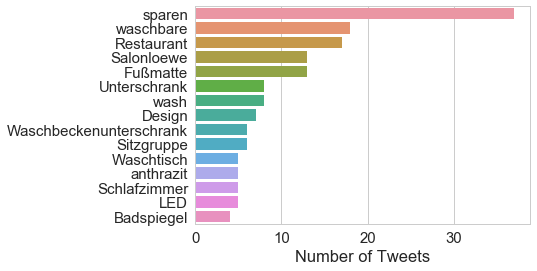

In [74]:
#plt.figure(figsize=(16,12))

ax = sns.barplot(y=dienst_hashtags['hashtag'].value_counts()[:15].index, x=dienst_hashtags['hashtag'].value_counts()[:15])
ax.set_xlabel("Number of Tweets")
#ax.set_title("Top URLs shared - Sampled Stream (Calendar Week 17)")

In [49]:
bot_net_dienst['hashtags'].value_counts()

Trendfarbe Wohnzimmer streichen                                      2
wash waschbare Fußmatte                                              2
Sitzsack Microvelour schmutzunempfindlich                            2
LED Design                                                           2
2er                                                                  2
Sitzgruppe Tortosa                                                   2
Rechteck                                                             2
Waschtisch Unterschrank Waschbeckenunterschrank                      2
Sitzgruppe Moa                                                       2
Cortenstahl Gartenbrunnen LED                                        2
Schwarz                                                              2
Badspiegel                                                           2
ungesund                                                             2
Kitchen Fußmatte wash                                                1
Panora

In [51]:
dienst_urls = urlsS03[urlsS03['tweet_id'].isin(bot_net_dienst['id'].values)]
dienst_urls

,tweet_id,short_url,resolved_url,response_code,domain,top_level_domain,is_twitter_url,is_media,is_processed,failed
23,952680235165626368,http://bit.ly/2D11AKd,https://gutscheinstadt.de/1x-oder-2x-40-min-massage-mit-oel-inkl-schroepfen-bei-by-souha-beauty-bis-zu-50-sparen,200.0,https://gutscheinstadt.de/,gutscheinstadt.de,False,False,True,False
38,952684219758718977,https://goo.gl/xUVpQX,https://liebevolles-wohnen.de/artikel/hartman-verde-klappsesselauflage-123x50x5cm-gruen,403.0,https://liebevolles-wohnen.de/,liebevolles-wohnen.de,False,False,True,False
56,952688003029270530,https://goo.gl/5Vkn1z,https://gutscheinstadt.de/microblading-fuer-beide-augenbrauen-inkl-nachbehandlung-bei-permanent-beauty-71-sparen,200.0,https://gutscheinstadt.de/,gutscheinstadt.de,False,False,True,False
103,952695720511004674,https://goo.gl/gCT2Nm,https://gutscheinstadt.de/1x-oder-2x-25-min-od-60-min-massage-nach-wahl-z-b-ganzkoerper-od-fuss-massage-bei-royal-grace-bis-zu-70-sparen,200.0,https://gutscheinstadt.de/,gutscheinstadt.de,False,False,True,False
112,952699403118276609,https://goo.gl/ymmURB,https://gutscheinstadt.de/corvette-c6-selber-fahren-in-wunstorf-mesmerode-ein-wochenende-lang-die-corvette-c6-erleben,200.0,https://gutscheinstadt.de/,gutscheinstadt.de,False,False,True,False
148,952707003213930498,https://goo.gl/mGuet8,https://badbadbad.de/produkte/badspiegel-led-muehlheim,403.0,https://badbadbad.de/,badbadbad.de,False,False,True,False
160,952711897966620672,https://goo.gl/bM8bF9,https://wohnungeneinrichten.net/produkt/ist-ein-daenischer-kamin,200.0,https://wohnungeneinrichten.net/,wohnungeneinrichten.net,False,False,True,False
236,952740960307417089,https://goo.gl/zzz4Dz,https://liebevolles-wohnen.de/artikel/moooi-kroon-7-led-pendelleuchte-design-zmik,403.0,https://liebevolles-wohnen.de/,liebevolles-wohnen.de,False,False,True,False
255,952748531030339590,https://goo.gl/euidZX,https://liebevolles-wohnen.de/artikel/espero-von-mca-vitrine-schmal-links-asteiche-bianco-teilmassiv,403.0,https://liebevolles-wohnen.de/,liebevolles-wohnen.de,False,False,True,False
778,952827664930365440,https://goo.gl/FJpwng,https://wohnungeneinrichten.net/produkt/welches-licht-kommt-fuer-das-kinderzimmer-frage,200.0,https://wohnungeneinrichten.net/,wohnungeneinrichten.net,False,False,True,False


In [75]:
dienst_urls['short_url'].value_counts()

https://goo.gl/TcXp2D    3
https://goo.gl/nbmdaW    3
https://goo.gl/nT7tYr    2
https://goo.gl/gn5YtU    2
https://goo.gl/VJapKC    2
https://goo.gl/rt1sEG    2
https://goo.gl/FJpwng    2
https://goo.gl/bM8bF9    2
https://goo.gl/aZ896u    2
https://goo.gl/NsDqFV    2
https://goo.gl/xKk2dn    1
https://goo.gl/uBEKAx    1
https://goo.gl/sfaf7J    1
https://goo.gl/wjQYKo    1
https://goo.gl/XLbYjP    1
https://goo.gl/nfBn5X    1
https://goo.gl/S9J64g    1
https://goo.gl/EFRuqk    1
https://goo.gl/mpSH8D    1
https://goo.gl/KPswJw    1
https://goo.gl/v32Sy9    1
https://goo.gl/aXd6cj    1
https://goo.gl/4PYFYT    1
https://goo.gl/q7joS8    1
https://goo.gl/96AGpL    1
https://goo.gl/4V1ZQz    1
https://goo.gl/7dFjRA    1
https://goo.gl/c1kicB    1
https://goo.gl/XvrW6G    1
https://goo.gl/6XK3FR    1
                        ..
https://goo.gl/yi1ePv    1
https://goo.gl/EGiUgA    1
https://goo.gl/XyhmOI    1
https://goo.gl/Txf6Ne    1
http://bit.ly/2DvCRPf    1
https://goo.gl/CKHFV5    1
h

In [54]:
dienst_urls['top_level_domain'].value_counts()[:25]

gutscheinstadt.de          77
badbadbad.de               75
innendeko-aussendeko.de    47
inside53.de                43
wohnungeneinrichten.net    32
rotwein-am-kamin.de        25
liebevolles-wohnen.de      21
meerwasser-hardware.de     9 
ohmyprints.com             1 
Name: top_level_domain, dtype: int64

Text(0.5,0,'Number of Tweets')

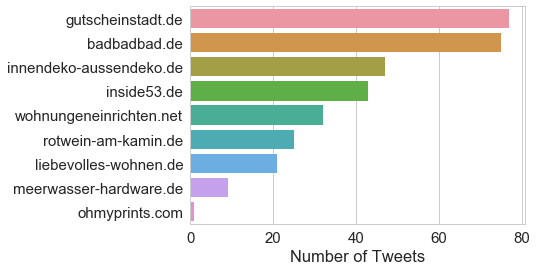

In [77]:
#plt.figure(figsize=(16,12))

ax = sns.barplot(y=dienst_urls['top_level_domain'].value_counts()[:25].index, x=dienst_urls['top_level_domain'].value_counts()[:25])
#ax.set_title("Top Level Domains - Shared by diens")
ax.set_xlabel("Number of Tweets")

In [79]:
dienst_users = usersS03[usersS03['id'].isin(bot_net_dienst['user_id'].values)]
dienst_users

,id,name,location,url,description,protected,verified,followers_count,friends_count,listed_count,...,created_at,geo_enabled,lang,contributors_enabled,profile_background_image_url,profile_use_background_image,profile_image_url,profile_banner_url,default_profile,default_profile_image
130,248367761,Arlie Hitchens,None,http://www.dienstleistungstausch.org,None,False,False,6,2,8,...,Sun Feb 06 21:14:43 +0000 2011,False,de,False,http://abs.twimg.com/images/themes/theme8/bg.gif,true,http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png,None,False,False
270,208717954,Sharon Mcferren,"Georgia, USA",http://bit.ly/2pPV2ar,None,False,False,4,0,1,...,Wed Oct 27 20:18:30 +0000 2010,False,en,False,http://abs.twimg.com/images/themes/theme1/bg.png,true,http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png,None,True,False
284,209502774,David Garay,"Soem, Thailand",http://bit.ly/2pPV2ar,😳😳😳,False,False,1,0,0,...,Fri Oct 29 09:36:49 +0000 2010,False,en,False,http://abs.twimg.com/images/themes/theme1/bg.png,false,http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png,None,False,False
488,209504771,Tamara Mahan,"Ina-shi, Nagano",https://tinyurl.com/yao32uh9,None,False,False,2,0,1,...,Fri Oct 29 09:43:48 +0000 2010,False,en,False,http://abs.twimg.com/images/themes/theme1/bg.png,false,http://pbs.twimg.com/profile_images/889793430808924160/e67_3V55_normal.jpg,https://pbs.twimg.com/profile_banners/209504771/1500978238,False,False
585,210772369,Mario Harris,"Opa-Locka, FL",http://tinyurl.com/yao32uh9,None,False,False,5,0,0,...,Mon Nov 01 10:48:08 +0000 2010,False,en,False,http://abs.twimg.com/images/themes/theme1/bg.png,false,http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png,None,False,False
590,210774791,David Israel,Greece,http://bit.ly/2pPV2ar,None,False,False,2,0,0,...,Mon Nov 01 10:59:51 +0000 2010,False,en,False,http://abs.twimg.com/images/themes/theme1/bg.png,false,http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png,None,False,False
600,208661964,James Trusty,"Erlangen, Germany",http://bit.ly/2pPV2ar,None,False,False,2,0,0,...,Wed Oct 27 17:52:11 +0000 2010,False,en,False,http://abs.twimg.com/images/themes/theme1/bg.png,false,http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png,None,False,False
602,208774250,Dianne Tomczak,Germany,http://bit.ly/2pPV2ar,None,False,False,7,2,0,...,Wed Oct 27 22:47:11 +0000 2010,False,en,False,http://abs.twimg.com/images/themes/theme1/bg.png,false,http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png,None,False,False
656,209192199,Agnes Gould,"Hillingdon, London",http://tinyurl.com/yao32uh9,😀😀😬😬😅😅,False,False,3,0,0,...,Thu Oct 28 18:00:23 +0000 2010,False,en,False,http://abs.twimg.com/images/themes/theme1/bg.png,false,http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png,None,False,False
660,214400276,Vincent Thomas,Germany,http://bit.ly/2pPV2ar,None,False,False,1,0,0,...,Thu Nov 11 09:35:28 +0000 2010,False,en,False,http://abs.twimg.com/images/themes/theme1/bg.png,false,http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png,None,False,False


In [87]:
#dienst_users['created_at'] = dienst_users['created_at'].dt.tz_localize("UTC").dt.tz_convert("Europe/Berlin")
#tweetsS03['created_at'] = tweetsS03['created_at'].dt.tz_localize("UTC").dt.tz_convert("Europe/Berlin")
dienst_users['created_at'] = dienst_users['created_at'].astype('datetime64[ns]')

c:\users\bender\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0,0.5,'users created')

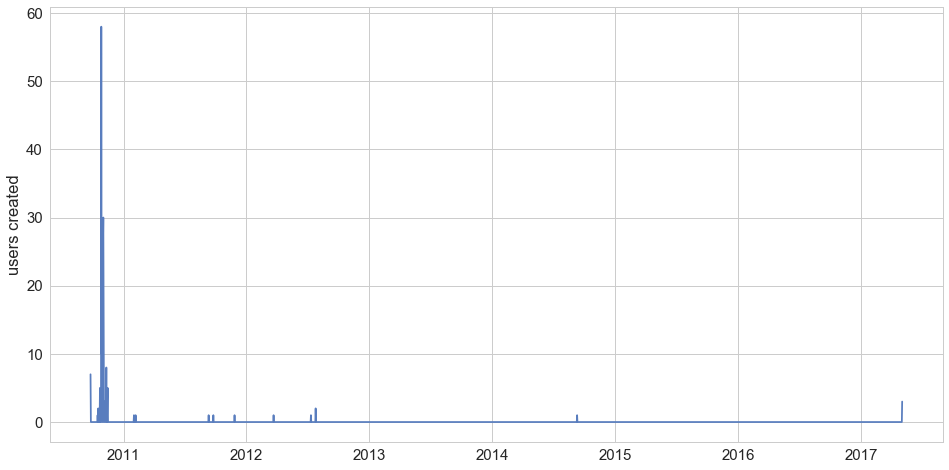

In [109]:
plt.figure(figsize=(16,8))
user_created_count = dienst_users['created_at'].value_counts().resample('D').sum()
ax = plt.plot(user_created_count.index, user_created_count)
plt.ylabel('users created')

Text(0,0.5,'users created')

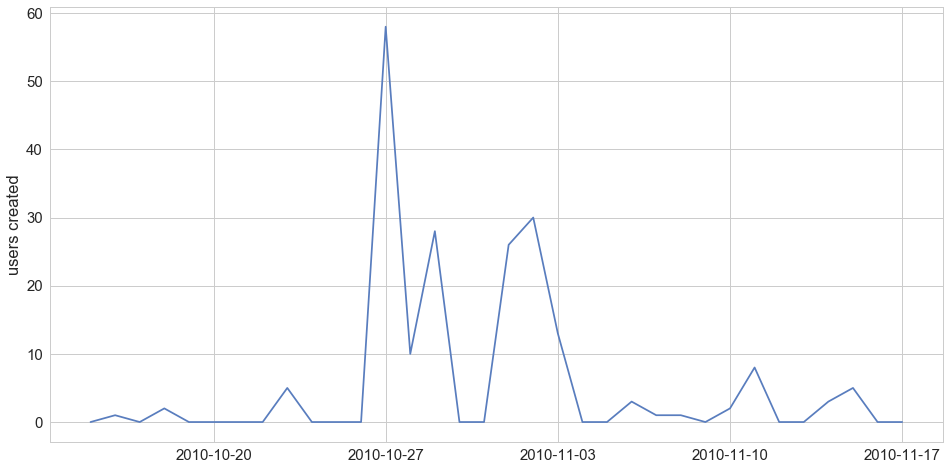

In [111]:
plt.figure(figsize=(16,8))
user_created_count = dienst_users['created_at'].value_counts().resample('D').sum().loc['2010-10-14 01:00:00':'2010-11-17 01:00:00']
plt.plot(user_created_count.index, user_created_count)
plt.ylabel('users created')

Text(0,0.5,'users created')

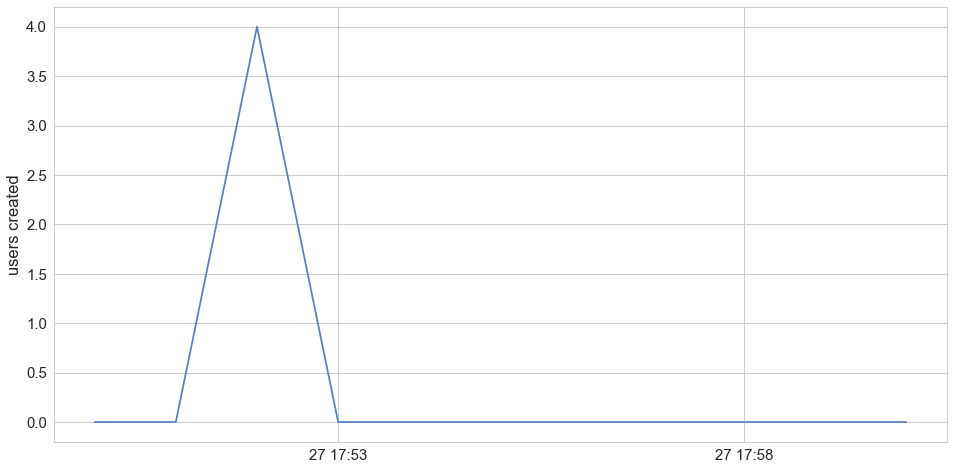

In [125]:
plt.figure(figsize=(16,8))
user_created_count = dienst_users['created_at'].value_counts().resample('Min').sum().loc['2010-10-27 17:50:00':'2010-10-27 18:00:00']
plt.plot(user_created_count.index, user_created_count)
plt.ylabel('users created')

In [93]:
dienst_users['created_at'].value_counts().resample('D').sum()

2010-09-25    7
2010-09-26    0
2010-09-27    0
2010-09-28    0
2010-09-29    0
2010-09-30    0
2010-10-01    0
2010-10-02    0
2010-10-03    0
2010-10-04    0
2010-10-05    0
2010-10-06    0
2010-10-07    0
2010-10-08    0
2010-10-09    0
2010-10-10    0
2010-10-11    0
2010-10-12    0
2010-10-13    0
2010-10-14    0
2010-10-15    0
2010-10-16    1
2010-10-17    0
2010-10-18    2
2010-10-19    0
2010-10-20    0
2010-10-21    0
2010-10-22    0
2010-10-23    5
2010-10-24    0
             ..
2017-04-04    0
2017-04-05    0
2017-04-06    0
2017-04-07    0
2017-04-08    0
2017-04-09    0
2017-04-10    0
2017-04-11    0
2017-04-12    0
2017-04-13    0
2017-04-14    0
2017-04-15    0
2017-04-16    0
2017-04-17    0
2017-04-18    0
2017-04-19    0
2017-04-20    0
2017-04-21    0
2017-04-22    0
2017-04-23    0
2017-04-24    0
2017-04-25    0
2017-04-26    0
2017-04-27    0
2017-04-28    0
2017-04-29    0
2017-04-30    0
2017-05-01    0
2017-05-02    0
2017-05-03    3
Freq: D, Name: created_a

In [84]:
len(bot_net_dienst['user_id'].value_counts())

216